In [1]:
# Importar las librerías necesarias
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  


# Cargar y Explorar los Datos
Carga el archivo parquet usando pandas y realiza una exploración inicial de los datos, incluyendo estadísticas descriptivas y visualización de distribuciones.

In [2]:
# Cargar el archivo parquet
file_path = '../../data/processed/inmuebles24_departamentos.parquet'
df = pd.read_parquet(file_path)

In [3]:
# Exploración inicial de los datos
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,cuenta_con_terraza,cuenta_con_comedor,cuenta_con_area_de_lavado,cuenta_con_salon_usos_multiples,cuenta_con_mantenimiento_incluido,cuenta_con_vigilancia_24_horas,direccion,colonia,cp,municipio
0,24000.0,100,2,2,1.0,0,0,1,1,0,...,0,1,0,0,0,0,"san jeronimo lidice san jeronimo lidice, la ma...",san jeronimo lidice,10200,la magdalena contreras
1,12000.0,50,1,1,1.0,1,0,0,1,1,...,0,0,1,0,1,0,"callejon del prado barrio san francisco, la ma...",el prado,9480,la magdalena contreras
2,34100.0,232,3,4,2.0,0,0,1,1,1,...,1,1,0,0,0,1,"blvd. adolfo ruiz cortines, 2775 san jeronimo ...",adolfo ruiz cortines,4630,la magdalena contreras
3,16000.0,165,2,1,1.0,0,0,0,1,0,...,0,1,0,0,0,0,"magnolia 26 san jeronimo lidice, la magdalena ...",san jeronimo lidice,10200,la magdalena contreras
4,26000.0,180,3,2,2.0,0,0,1,0,1,...,0,0,0,0,0,1,"san marcos 11 pedregal 2, la magdalena contreras",san marcos,2020,la magdalena contreras


In [4]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   precio_mxn                         10231 non-null  float64
 1   lote_m2                            10160 non-null  Int64  
 2   recamaras                          9942 non-null   Int64  
 3   baños                              10097 non-null  Int64  
 4   estacionamiento                    10231 non-null  float64
 5   es_amueblado                       10231 non-null  int64  
 6   es_penthouse                       10231 non-null  int64  
 7   cuenta_con_cocina_integral         10231 non-null  int64  
 8   cuenta_con_sala                    10231 non-null  int64  
 9   cuenta_con_closet                  10231 non-null  int64  
 10  cuenta_con_balcon                  10231 non-null  int64  
 11  cuenta_con_gimnasi

In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,cuenta_con_terraza,cuenta_con_comedor,cuenta_con_area_de_lavado,cuenta_con_salon_usos_multiples,cuenta_con_mantenimiento_incluido,cuenta_con_vigilancia_24_horas,direccion,colonia,cp,municipio
count,10231.000000,10160.0,9942.0,10097.0,10231.000000,10231.000000,10231.000000,10231.000000,10231.000000,10231.000000,...,10231.000000,10231.000000,10231.000000,10231.000000,10231.000000,10231.000000,10231,10231,10231,10231
unique,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5986,373,342,15
top,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"polanco polanco, miguel hidalgo",hidalgo,1120,miguel hidalgo
freq,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,76,2964,2973,3313
mean,39243.034788,322.54498,2.024643,1.779241,1.379044,0.300166,0.041736,0.311797,0.544326,0.235363,...,0.236536,0.501222,0.052390,0.001857,0.192063,0.515003,NaN,NaN,NaN,NaN
std,32203.061387,13700.695725,0.793607,0.779398,0.946056,0.458352,0.199995,0.463250,0.498056,0.424246,...,0.424976,0.500023,0.222823,0.043056,0.393942,0.499799,NaN,NaN,NaN,NaN
min,12.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,20000.000000,63.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,29500.000000,90.0,2.0,2.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,45000.000000,148.0,3.0,2.0,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN


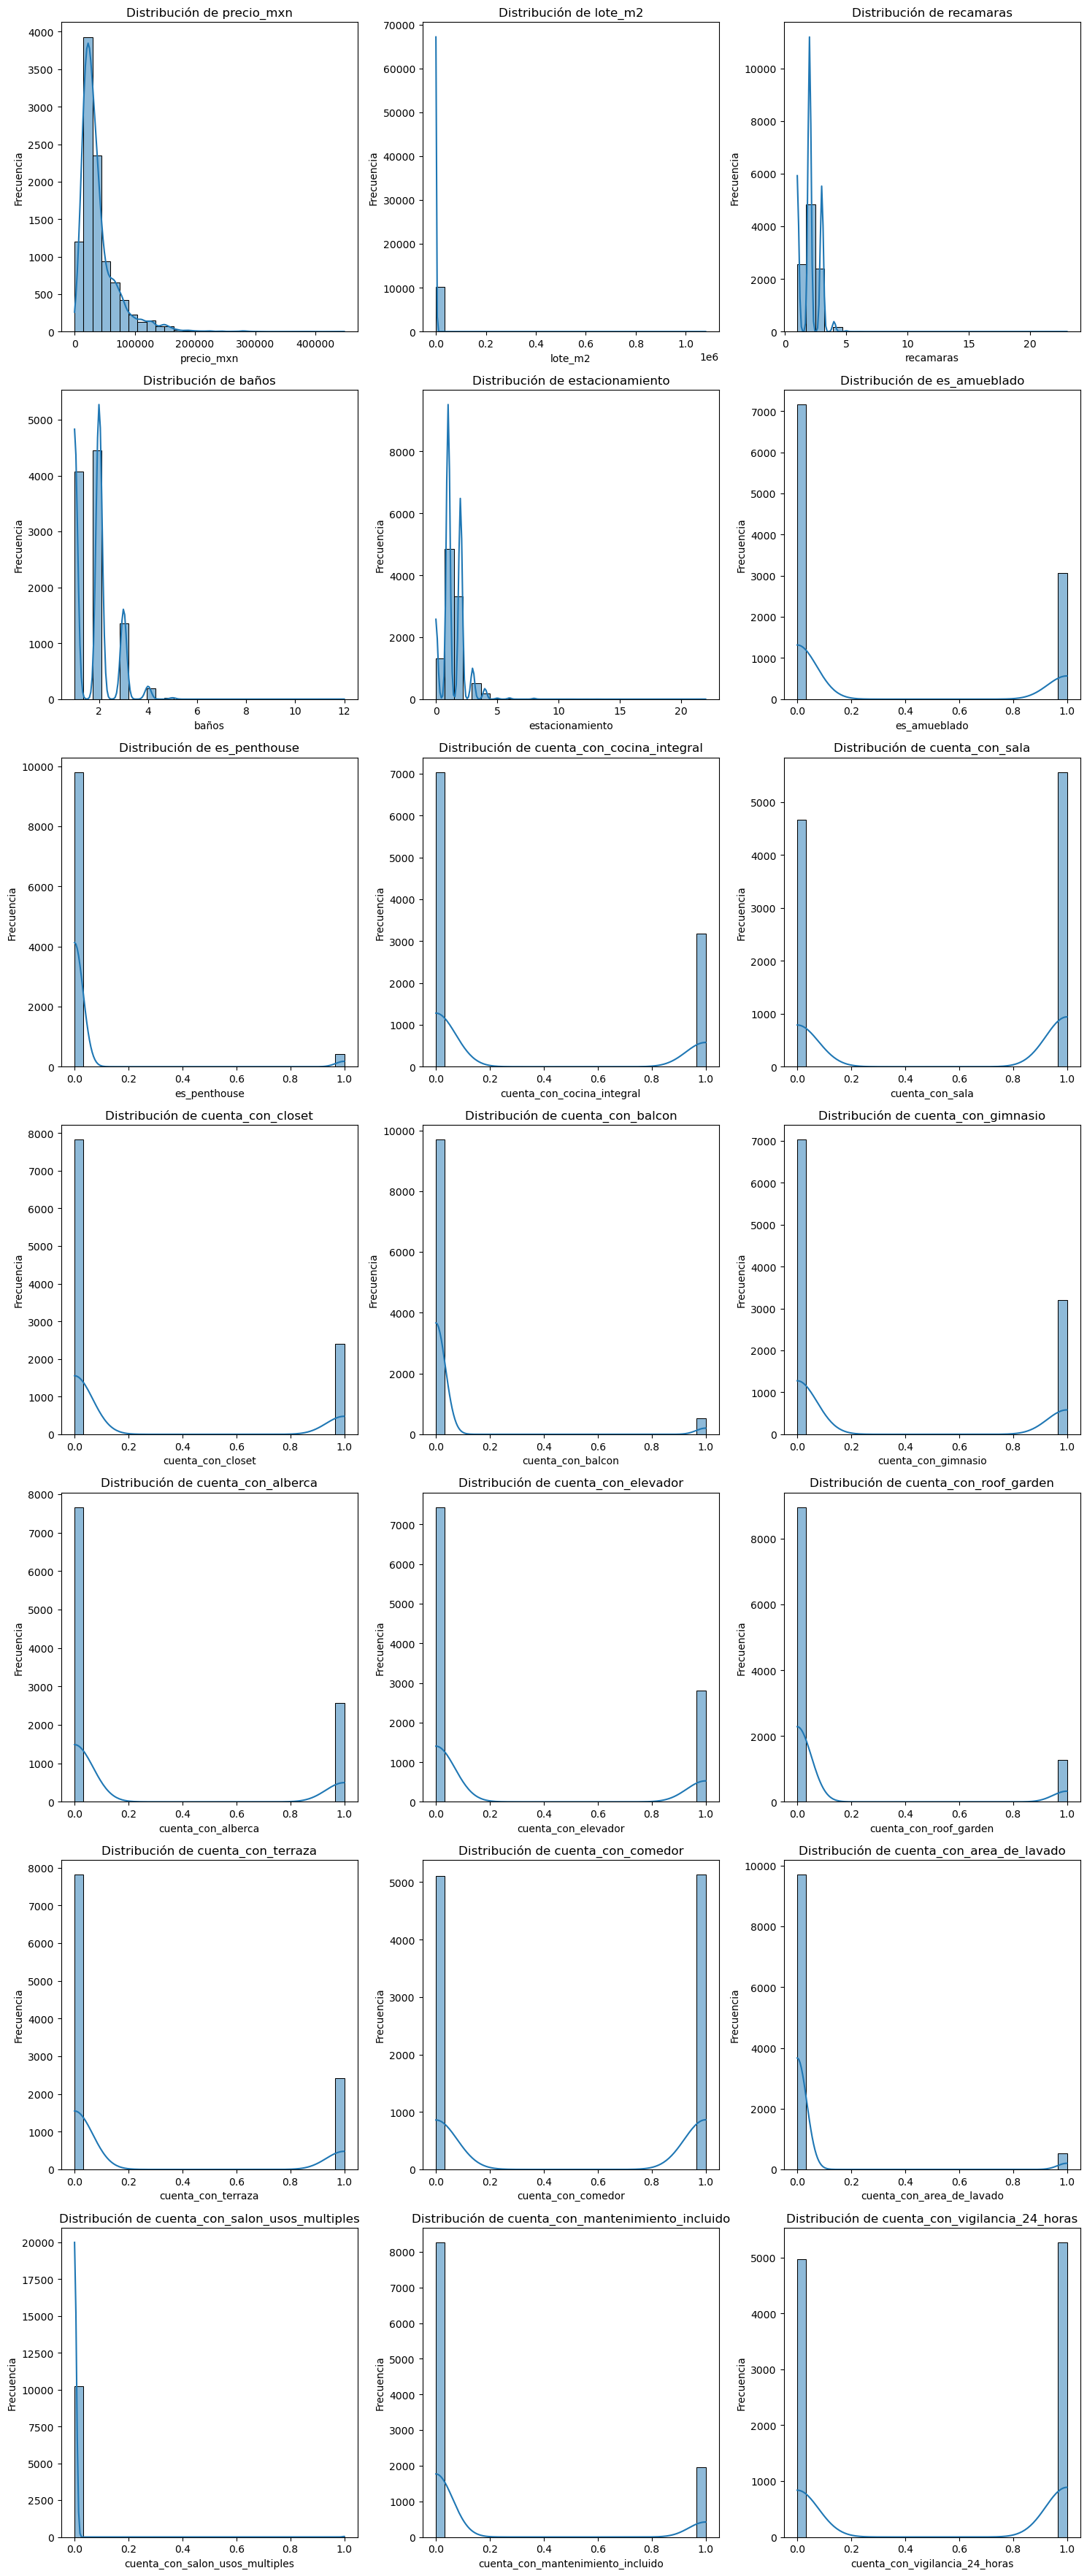

In [6]:
# Visualización de distribuciones
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear subplots para las columnas numéricas
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos subplots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

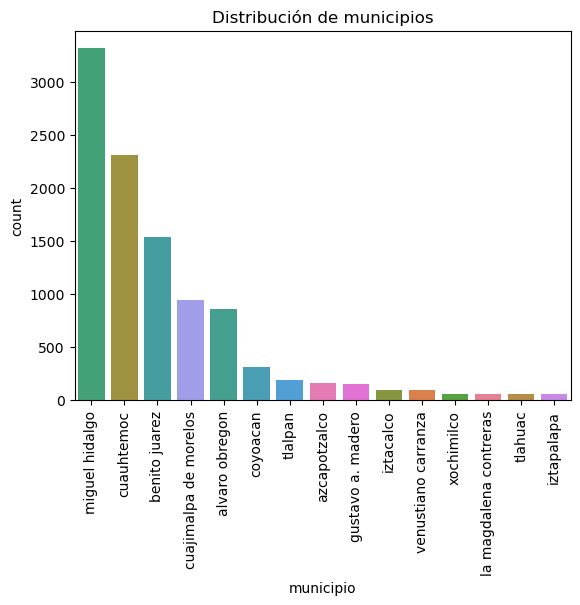

In [7]:
municipio_order = df['municipio'].value_counts().index

sns.countplot(data=df, x='municipio', order=municipio_order, hue='municipio')
plt.xticks(rotation=90)
plt.title('Distribución de municipios')
plt.show()

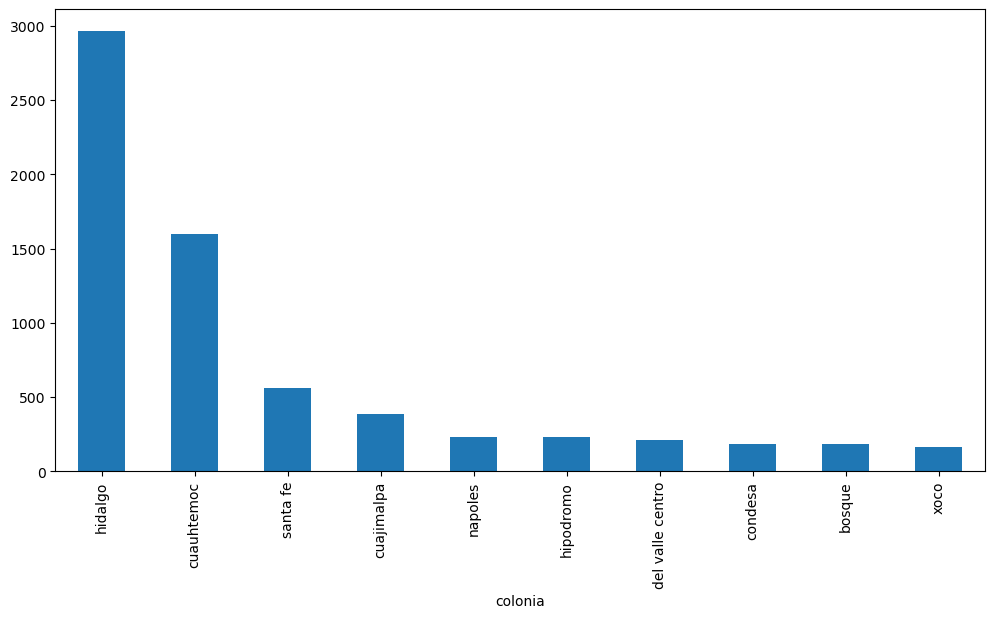

In [8]:
df.colonia.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

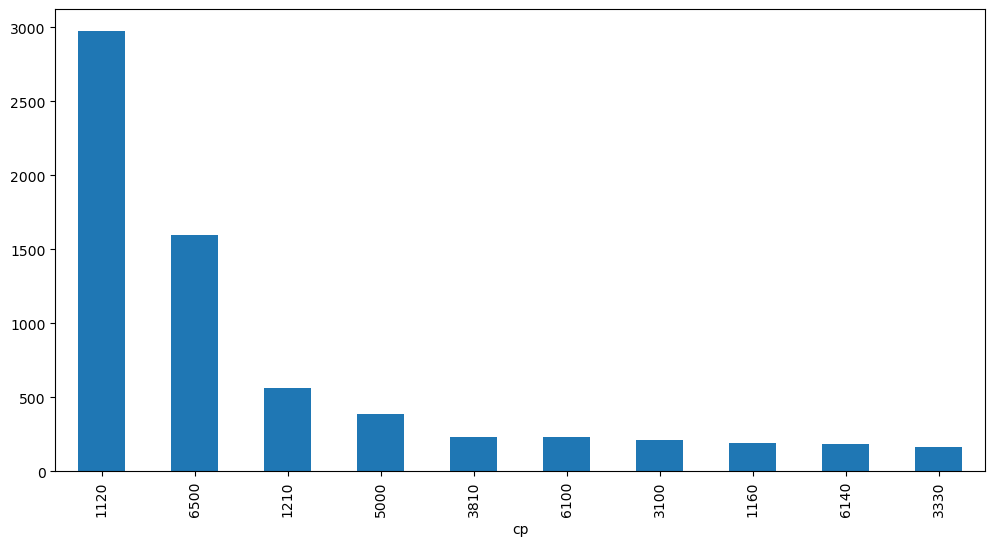

In [9]:
# Un CP puede contener varias colonias, así que nos quedamos sólo con colonias
df.cp.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

In [10]:
top10_cols= list(df.colonia.value_counts().head(10).index)

In [11]:
df['colonia_top10'] = df['colonia'].where(df['colonia'].isin(top10_cols), 'otros')

# Preprocesamiento de Datos
Aplica técnicas de limpieza de datos, manejo de valores nulos y codificación de variables categóricas.

In [12]:
# Identificar valores nulos en el DataFrame
print("\nValores nulos por columna:")
df.isnull().sum().sort_values(ascending=False)


Valores nulos por columna:


recamaras                            289
baños                                134
lote_m2                               71
precio_mxn                             0
cuenta_con_terraza                     0
municipio                              0
cp                                     0
colonia                                0
direccion                              0
cuenta_con_vigilancia_24_horas         0
cuenta_con_mantenimiento_incluido      0
cuenta_con_salon_usos_multiples        0
cuenta_con_area_de_lavado              0
cuenta_con_comedor                     0
cuenta_con_elevador                    0
cuenta_con_roof_garden                 0
cuenta_con_alberca                     0
cuenta_con_gimnasio                    0
cuenta_con_balcon                      0
cuenta_con_closet                      0
cuenta_con_sala                        0
cuenta_con_cocina_integral             0
es_penthouse                           0
es_amueblado                           0
estacionamiento 

In [13]:
categorical_columns = list(df.select_dtypes(include=["object", "category"]).columns)
categorical_columns.remove('direccion')

In [14]:
df = pd.get_dummies(df, columns=['municipio','colonia_top10'], drop_first=True)

In [15]:
df.head()

,precio_mxn,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,24000.0,100,2,2,1.0,0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
1,12000.0,50,1,1,1.0,1,0,0,1,1,...,False,False,False,False,False,False,False,True,False,False
2,34100.0,232,3,4,2.0,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
3,16000.0,165,2,1,1.0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
4,26000.0,180,3,2,2.0,0,0,1,0,1,...,False,False,False,False,False,False,False,True,False,False


In [16]:
df.shape

(10231, 48)

# Clustering
Realiza un análisis de clustering para agrupar los datos en diferentes segmentos.

In [17]:
# Sólo seleccionar las columnas relevantes para el standarizado porque el resto son flags
cols = ['precio_mxn', 'lote_m2', 'recamaras', 'baños', 'estacionamiento']

In [18]:
# Escalar los datos
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [19]:
## Arreglar los nulos y quitar esta celda
df = df.dropna()

In [20]:
df_analysis = df.drop(['direccion','colonia','precio_mxn','cp'], axis=1)

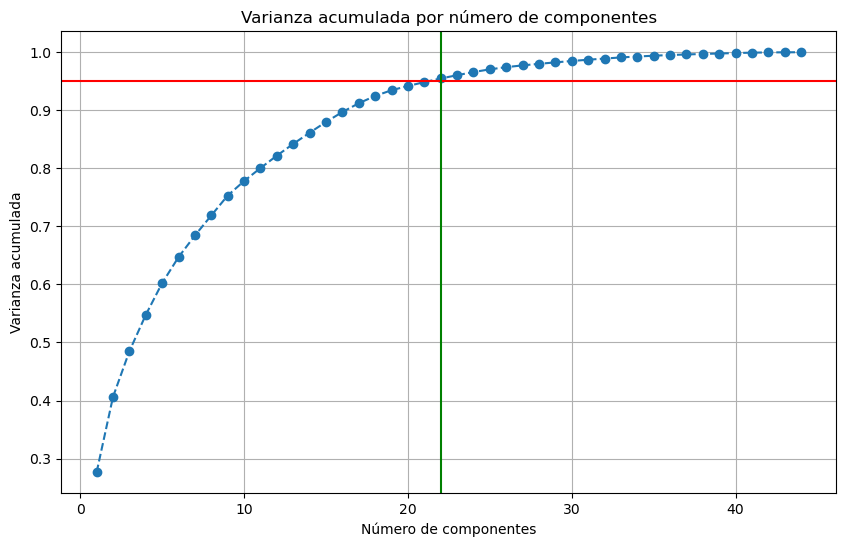

Número óptimo de componentes: 22


In [21]:
# Crear el modelo PCA sin especificar n_components
pca = PCA()
pca.fit(df_analysis)

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='-')
plt.grid()
plt.show()

# Elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número óptimo de componentes: {n_components}")



In [22]:
print("Varianza acumulada:")
print(cumulative_variance)


Varianza acumulada:
[0.27651972 0.40632723 0.48494658 0.54760216 0.60241352 0.6470922
 0.68434643 0.71890799 0.75314994 0.77809338 0.80047038 0.82185048
 0.84211375 0.86133838 0.87988874 0.89702069 0.91210039 0.92470139
 0.93452235 0.94182022 0.94852811 0.95474761 0.96039422 0.96584163
 0.97050098 0.97432005 0.9773219  0.97999142 0.98252513 0.98489019
 0.98708756 0.9890824  0.99104243 0.9925675  0.99398821 0.995177
 0.99614082 0.99703204 0.99779691 0.99854234 0.99926453 0.99965488
 0.99987009 1.        ]


In [27]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_analysis)

In [28]:
# Importancia de cada componente (varianza explicada)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

Varianza explicada por cada componente:
Componente 1: 27.65%
Componente 2: 12.98%
Componente 3: 7.86%
Componente 4: 6.27%
Componente 5: 5.48%
Componente 6: 4.47%
Componente 7: 3.73%
Componente 8: 3.46%
Componente 9: 3.42%
Componente 10: 2.49%
Componente 11: 2.24%
Componente 12: 2.14%
Componente 13: 2.03%
Componente 14: 1.92%
Componente 15: 1.86%
Componente 16: 1.71%
Componente 17: 1.51%
Componente 18: 1.26%
Componente 19: 0.98%
Componente 20: 0.73%
Componente 21: 0.67%
Componente 22: 0.62%


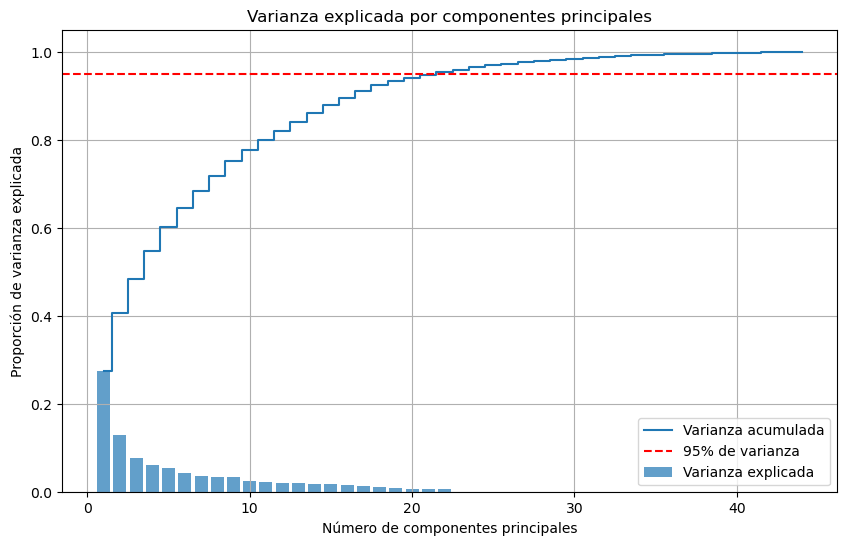

In [29]:
# Gráfica de varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
# Contribución de las características originales a los primeros 22 componentes
components = pd.DataFrame(pca.components_[:22], columns=df_analysis.columns)
print("\nContribución de las características originales a los primeros 22 componentes:")
components.T


Contribución de las características originales a los primeros 22 componentes:


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
lote_m2,0.012794,0.999434,-0.020855,0.005395,0.002055,-0.008363,-0.006728,0.006130,0.000240,0.001052,...,0.005334,0.008332,-0.002475,0.002948,0.002271,0.002963,-0.000909,-0.000898,0.001090,-0.000218
recamaras,0.560744,0.004676,0.555397,0.205431,-0.005328,-0.041166,0.043731,-0.181724,0.534823,0.022596,...,0.013923,0.020992,0.032060,-0.032310,0.039969,0.043797,-0.003676,-0.001484,0.007159,0.004775
baños,0.607465,-0.007922,0.050666,0.123335,-0.023977,0.321052,-0.041450,0.447089,-0.534113,0.025716,...,0.016025,-0.030675,-0.024561,0.038596,-0.074328,-0.023901,-0.005958,0.012306,-0.011615,-0.007516
estacionamiento,0.520817,-0.014995,-0.536592,-0.385668,-0.208546,-0.160432,-0.053674,-0.439202,0.018158,-0.022309,...,-0.015664,-0.013492,-0.077888,0.076798,0.061384,-0.047075,-0.025926,-0.025736,-0.010312,0.006430
es_amueblado,-0.037964,0.002570,-0.078322,0.088109,0.163400,0.184166,0.114721,-0.185711,-0.018392,0.652879,...,0.040847,0.130933,-0.039066,-0.118912,0.019483,0.102375,-0.018133,0.019962,0.014279,-0.009775
es_penthouse,0.029647,-0.000984,-0.003180,-0.003968,-0.004375,0.013662,0.002311,-0.001166,-0.029836,-0.008435,...,-0.055993,-0.013890,0.000039,0.009215,0.054219,0.072264,0.054406,-0.035417,0.003952,-0.126456
cuenta_con_cocina_integral,0.012018,0.002157,0.042187,-0.185587,0.178639,-0.077220,0.325412,0.147518,0.117902,-0.393703,...,-0.265614,-0.199497,0.165153,-0.026970,0.005471,0.018468,0.020887,-0.032420,0.007837,-0.013371
cuenta_con_sala,0.053776,0.000234,0.105665,-0.341682,0.512345,-0.026473,-0.289540,0.064057,0.003692,0.117857,...,-0.045346,-0.056440,-0.060919,-0.067902,0.040798,-0.005436,-0.009879,-0.667079,-0.027844,-0.143733
cuenta_con_closet,0.024092,-0.003638,0.040351,-0.142153,0.124905,-0.067091,0.126487,0.053724,-0.059108,-0.358939,...,0.638581,0.530352,0.070311,0.089460,0.103853,0.004245,-0.013404,-0.044896,-0.012850,-0.020152
cuenta_con_balcon,0.007593,-0.000946,0.002237,-0.004351,0.006032,0.013192,0.011328,-0.007876,-0.017971,0.009982,...,-0.017245,0.017044,-0.017627,0.045267,0.029867,0.034119,0.021330,0.027682,0.702799,0.063907


In [31]:
most_important_features = components.iloc[0].abs().sort_values(ascending=False).head(20)
print("Características más importantes del primer componente:")
print(most_important_features)

Características más importantes del primer componente:
baños                                0.607465
recamaras                            0.560744
estacionamiento                      0.520817
municipio_cuauhtemoc                 0.090271
municipio_miguel hidalgo             0.078818
cuenta_con_vigilancia_24_horas       0.069251
colonia_top10_cuauhtemoc             0.066314
colonia_top10_hidalgo                0.063567
cuenta_con_comedor                   0.056252
cuenta_con_sala                      0.053776
cuenta_con_terraza                   0.048943
cuenta_con_alberca                   0.042500
es_amueblado                         0.037964
municipio_cuajimalpa de morelos      0.034417
cuenta_con_elevador                  0.029960
es_penthouse                         0.029647
colonia_top10_otros                  0.026002
cuenta_con_closet                    0.024092
cuenta_con_gimnasio                  0.022376
cuenta_con_mantenimiento_incluido    0.019003
Name: 0, dtype: float64


In [32]:
# Reconstrucción aproximada de los datos originales
reconstructed_data = pca.inverse_transform(pca_data)

In [33]:

# Comparar los datos originales con los reconstruidos
print("Datos originales (primeras filas):")
df_analysis.head()

Datos originales (primeras filas):


,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,cuenta_con_balcon,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,-0.016244,-0.031053,0.283257,-0.400677,0,0,1,1,0,0,...,False,False,False,False,False,False,False,True,False,False
1,-0.019894,-1.291186,-0.999849,-0.400677,1,0,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
2,-0.006609,1.229079,2.849467,0.656395,0,0,1,1,1,0,...,False,False,False,False,False,False,False,True,False,False
3,-0.011500,-0.031053,-0.999849,-0.400677,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,False
4,-0.010405,1.229079,0.283257,0.656395,0,0,1,0,1,0,...,False,False,False,False,False,False,False,True,False,False


In [34]:
print("\nDatos reconstruidos (primeras filas):")
pd.DataFrame(reconstructed_data, columns=df_analysis.columns).head()


Datos reconstruidos (primeras filas):


,lote_m2,recamaras,baños,estacionamiento,es_amueblado,es_penthouse,cuenta_con_cocina_integral,cuenta_con_sala,cuenta_con_closet,cuenta_con_balcon,...,colonia_top10_condesa,colonia_top10_cuajimalpa,colonia_top10_cuauhtemoc,colonia_top10_del valle centro,colonia_top10_hidalgo,colonia_top10_hipodromo,colonia_top10_napoles,colonia_top10_otros,colonia_top10_santa fe,colonia_top10_xoco
0,-0.016813,-0.030956,0.282681,-0.398944,-0.004324,0.027327,0.996966,0.995202,0.006856,-0.027955,...,0.012233,0.008720,-0.021728,-0.031837,-0.019460,0.018642,-0.031446,1.026970,0.042016,-0.009419
1,-0.020089,-1.291012,-1.003728,-0.397975,0.993795,-0.013642,0.007928,1.030678,1.020672,0.398894,...,0.027367,-0.024143,-0.089018,-0.035033,-0.032443,0.062020,-0.035922,1.023769,0.129936,-0.018419
2,-0.006564,1.230163,2.841345,0.654816,-0.007268,0.156349,0.999348,0.986830,1.009790,-0.029960,...,0.012949,-0.007719,-0.022802,-0.019849,-0.070407,0.043808,-0.053196,1.035997,0.071836,-0.012906
3,-0.012209,-0.031171,-0.998537,-0.398266,-0.004073,-0.005338,-0.003270,0.998332,0.006393,-0.020082,...,0.013774,0.008643,-0.022653,-0.027095,-0.013382,0.012823,-0.021864,1.023900,0.034303,-0.021417
4,-0.011018,1.229241,0.283421,0.657601,-0.003727,0.021140,0.996278,-0.005236,1.004962,-0.046466,...,0.002835,0.011264,-0.023698,-0.008426,-0.025168,0.029723,-0.034329,1.017910,0.024055,-0.025742


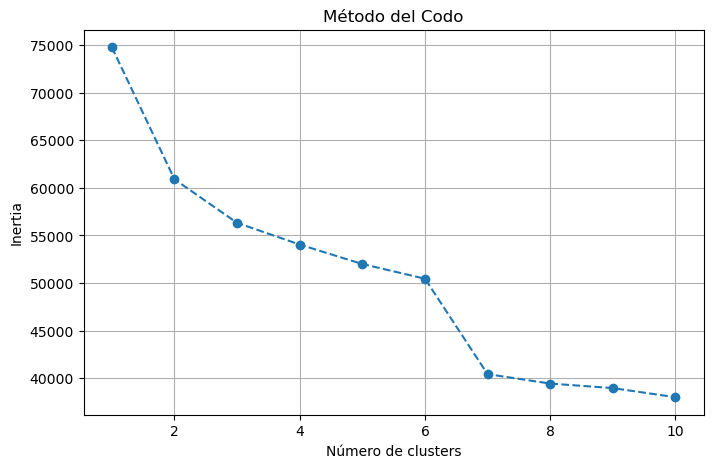

In [35]:
# Calcular la inertia para diferentes números de clusters
inertia = []
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Usa los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid()
plt.show()

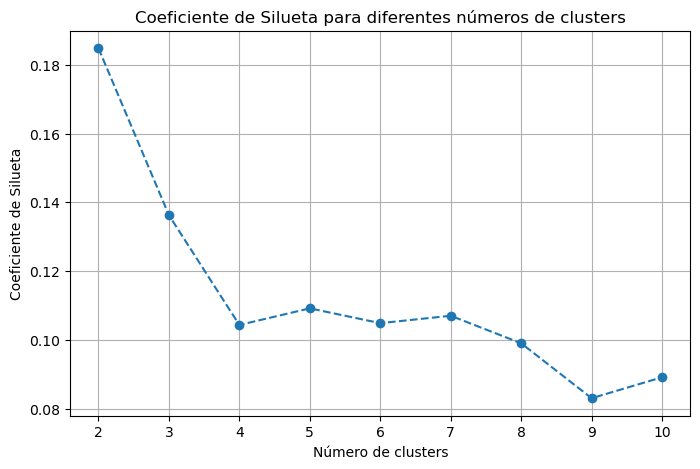

In [36]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de clusters')
plt.grid()
plt.show()

In [37]:
# Aplicar el algoritmo K-Means para clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_analysis)

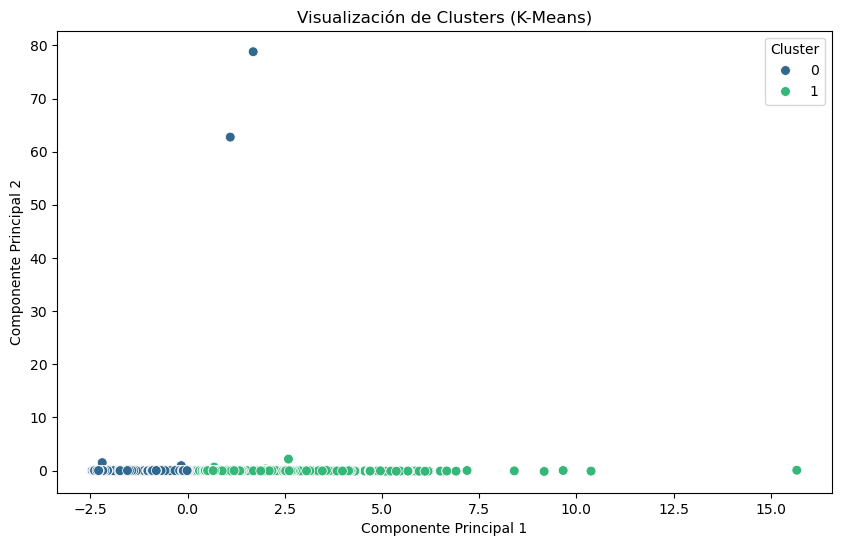

In [39]:

# Agregar los clusters al DataFrame original
df['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Visualización de Clusters (K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [40]:
# Mostrar el tamaño de cada cluster
cluster_sizes = df['Cluster'].value_counts()
print("\nTamaño de cada cluster:")
cluster_sizes


Tamaño de cada cluster:


Cluster
0    5456
1    4341
Name: count, dtype: int64

In [46]:
# Calcular las características promedio de cada cluster
numeric_columns = df.select_dtypes('number')
cluster_means = numeric_columns.groupby(df['Cluster']).mean()
cluster_means.T

Cluster,0,1
precio_mxn,-0.424192,0.561986
lote_m2,0.008845,-0.009608
recamaras,-0.565501,0.716724
baños,-0.609226,0.815593
estacionamiento,-0.567297,0.756477
es_amueblado,0.332478,0.255471
es_penthouse,0.012463,0.080857
cuenta_con_cocina_integral,0.302969,0.332412
cuenta_con_sala,0.495601,0.615296
cuenta_con_closet,0.215176,0.264225
